In [1]:
import pandas as pd
from scipy.stats import shapiro

In [2]:
def test_normality_stats_by_year(data, year, unique_tickers, year_normality):    
    for ticker in unique_tickers:
        df_filter = data['Ticker'] == ticker
        ticker_data = data[df_filter].Close.values

        if len(ticker_data) > 3:
            # normality test
            stat, p = shapiro(ticker_data)
            #print('Statistics=%.3f, p=%.3f' % (stat, p))
            # interpret
            alpha = 0.05
            looks_gaussian = 0
            if p > alpha:
                looks_gaussian = 1
            else:
                looks_gaussian = 0

            year_normality.append([year, ticker, looks_gaussian])    

In [3]:
df = sqlContext.sql("SELECT * FROM asxhistoric")

In [4]:
df.printSchema()

root
-- Close: double (nullable = true)
-- Date: timestamp (nullable = true)
-- High: double (nullable = true)
-- Low: double (nullable = true)
-- Ticker: string (nullable = true)
-- Volume: double (nullable = true)

In [5]:
from pyspark.sql.functions import year

def read_asx_historic_data(year):       
  return sqlContext.sql("SELECT * FROM asxhistoric WHERE YEAR ( CAST (Date as DATE) ) = '1997'")

In [6]:
year_normality = []
focus_years = sqlContext.sql("SELECT DISTINCT(YEAR(Date)) AS Year FROM asxhistoric ORDER BY Year ASC").toPandas()['Year'].values.tolist()

for year in focus_years: #[:1]:
  print(year)
  
  unique_tickers = sqlContext.sql("SELECT DISTINCT (Ticker) FROM asxhistoric WHERE YEAR ( CAST (Date as DATE) ) = '" + str(year) + "'").toPandas()['Ticker'].values.tolist()  
  df_year = sqlContext.sql("SELECT * FROM asxhistoric WHERE YEAR ( CAST (Date as DATE) ) = '" + str(year) + "'").toPandas()
  
  test_normality_stats_by_year(df_year, year, unique_tickers, year_normality)
  

1997
/databricks/python/lib/python3.5/site-packages/scipy/stats/morestats.py:1327: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
 warnings.warn("Input data for shapiro has range zero. The results "
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017

In [7]:
df_normality = pd.DataFrame(year_normality, columns=['Year', 'Ticker', 'Gaussian'])

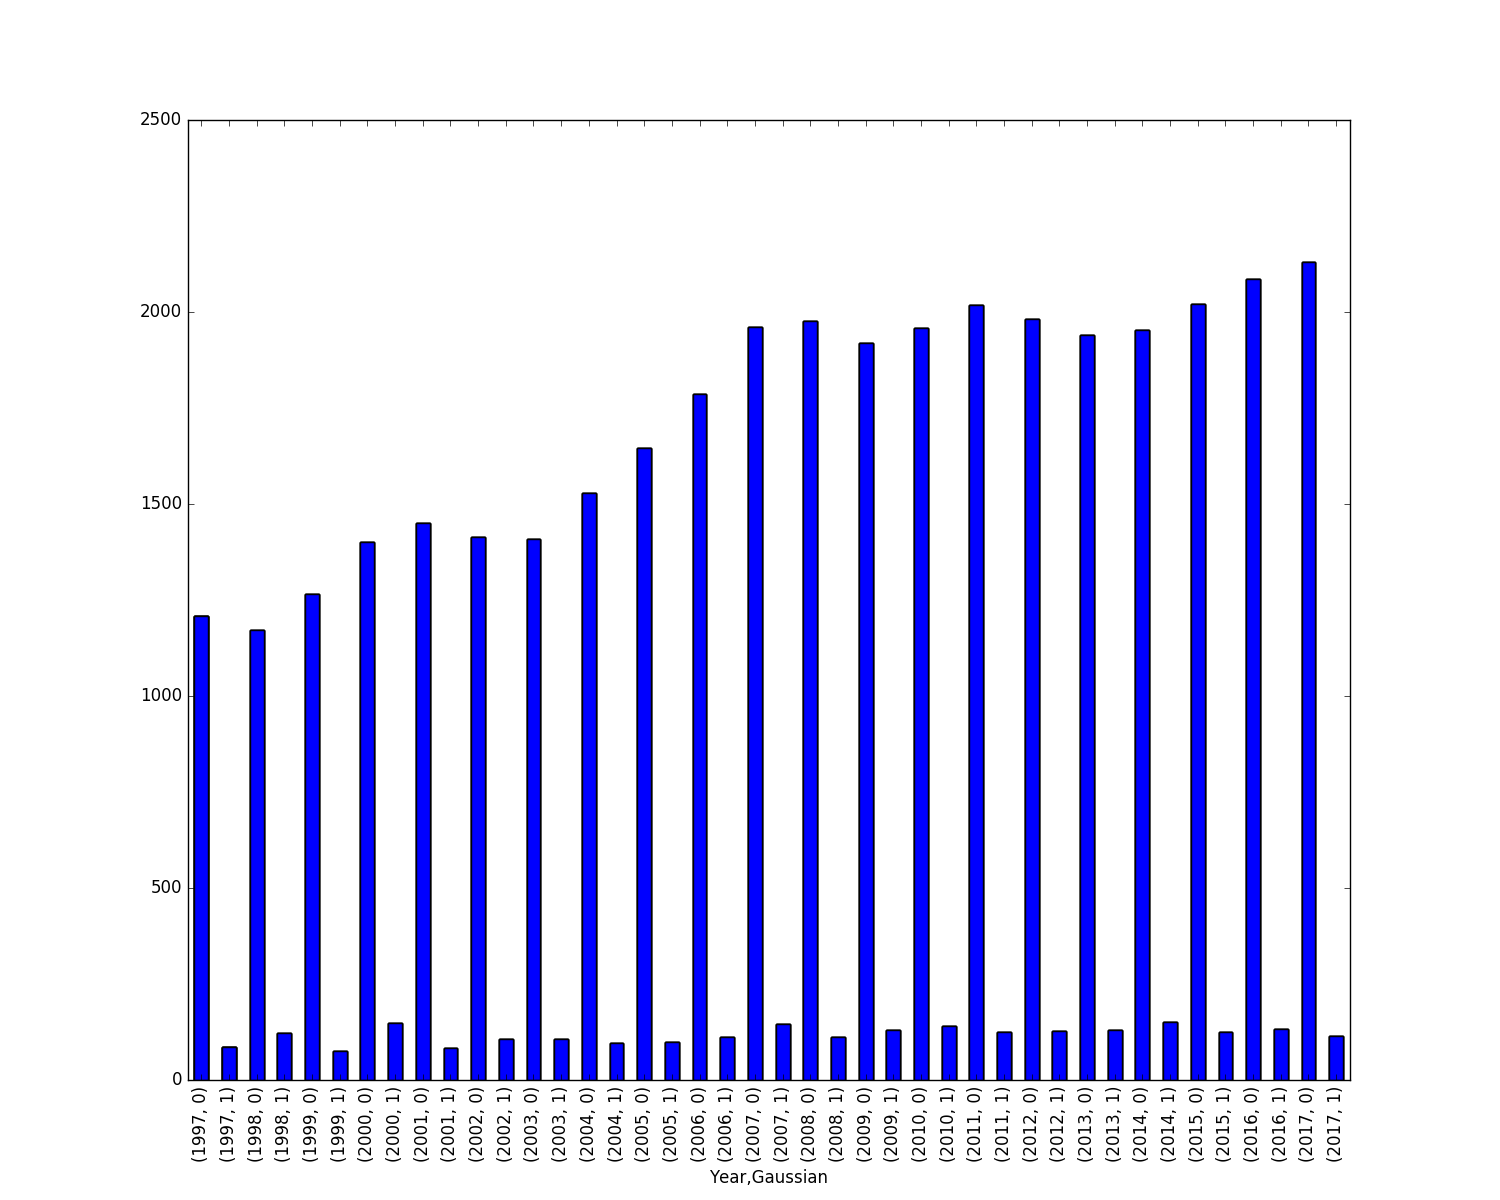

In [8]:
import matplotlib.pyplot as plt

normality_groups = df_normality.groupby(['Year']).Gaussian.value_counts()

fig = normality_groups.plot.bar(figsize=(15,12))
#fig = plt.figure(figsize=(15,6))
#plt.plot(normality_groups["Date"], pd_df["Close"])
#plt.title("Close", y=0.5, loc='right')
display(fig.figure)


In [9]:
normality_groups.head()

Out[ 29 ]: 
Year Gaussian
1997 0 1209
 1 85
1998 0 1173
 1 123
1999 0 1265
Name: Gaussian, dtype: int64